In [2]:
#Initiating Packages
import ROOT as r
import numpy as np
import math

Welcome to JupyROOT 6.22/00


In [3]:
#Opening the simulation ROOT file
fsimu = r.TFile("samples/Run2012BC_DoubleMuParked_skim.root")
#listing the content of the file
fsimu.ls()
t = fsimu.Get("Events")

TFile**		samples/Run2012BC_DoubleMuParked_skim.root	
 TFile*		samples/Run2012BC_DoubleMuParked_skim.root	
  KEY: TTree	Events;2	Events
  KEY: TTree	Events;1	Events


In [4]:
#See how many events are there in this tree
nEntries = t.GetEntries()
print(nEntries)

28859


In [5]:
#test a examplar event
t.Show(13863)

======> EVENT:13863
 run             = 201602
 luminosityBlock = 482
 event           = 663974244
 HLT_IsoMu24_eta2p1 = 1
 HLT_IsoMu24     = 1
 HLT_IsoMu17_eta2p1_LooseIsoPFTau20 = 1
 PV_npvs         = 25
 PV_x            = 0.0733916
 PV_y            = 0.0682706
 PV_z            = 2.52752
 nMuon           = 3
 Muon_pt         = 41.7265, 
                  46.8018, 6.98975
 Muon_eta        = -0.321514, 
                  0.042511, -0.646003
 Muon_phi        = -2.04514, 
                  1.13852, -2.3938
 Muon_mass       = 0.105658, 
                  0.105658, 0.105658
 Muon_charge     = -1, 
                  1, -1
 Muon_pfRelIso03_all = 0.0370553, 
                  0, -999
 Muon_pfRelIso04_all = 0.0370553, 
                  0.0618791, -999
 Muon_tightId    = 1, 
                  1, 0
 Muon_softId     = 1, 
                  1, 0
 Muon_dxy        = 0.00139095, 
                  0.00130484, -999
 Muon_dxyErr     = 0.00217884, 
                  0.00176071, -999
 Muon_dz         = -

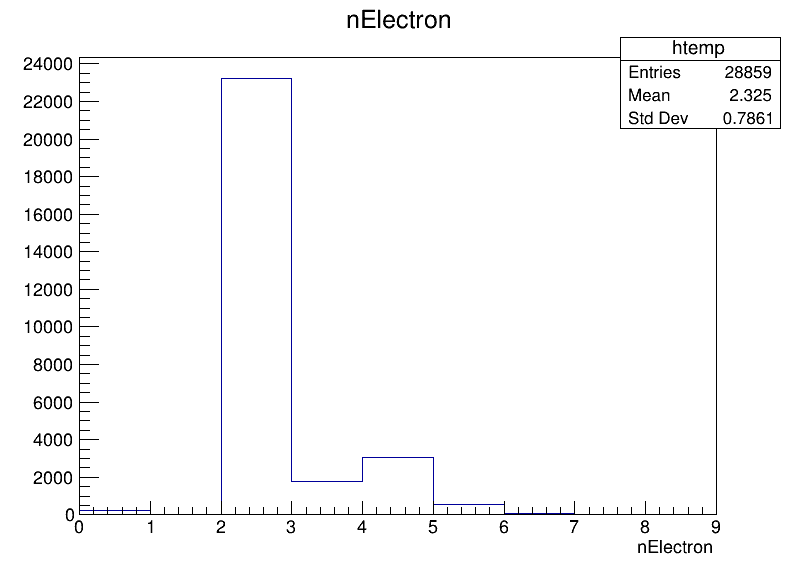

In [6]:
c = r.TCanvas('c1','c1',800,600)
t.Draw('nElectron')
c.Draw()

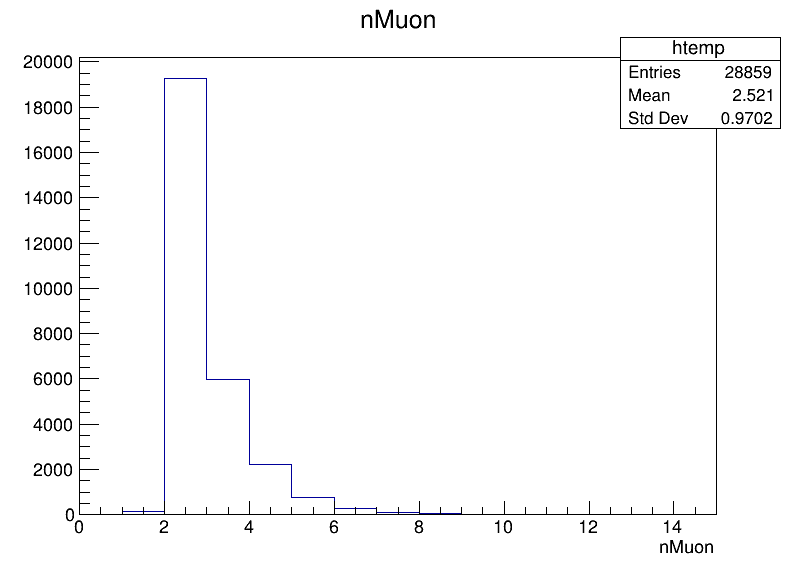

In [7]:
t.Draw('nMuon')
c.Draw()

In [18]:
#Creating a histogram for invmass
h_invmass = r.TH1F('invmass','invmass',200,0,200)
h_invmass.Draw()
c.Update()

Warning in <TFile::Append>: Replacing existing TH1: invmass (Potential memory leak).


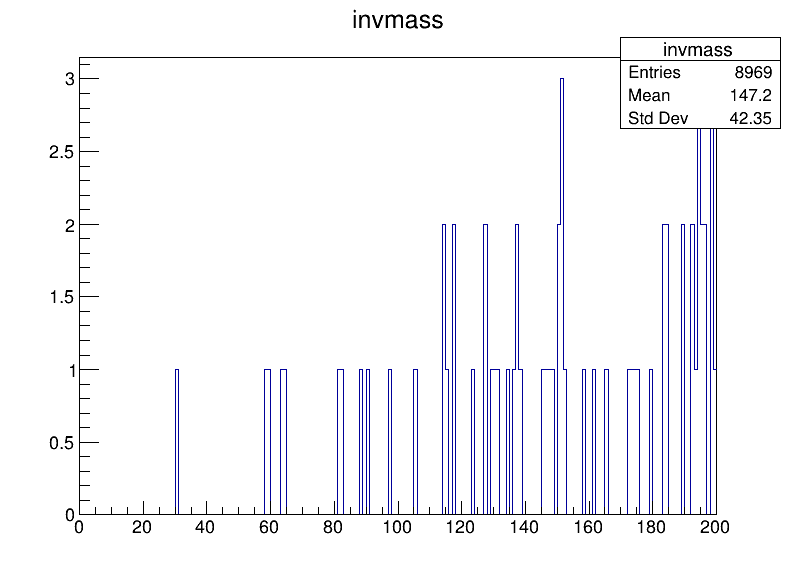

In [19]:
#selecting the particles
for i in range(0,nEntries):
    t.GetEntry(i)
    nGoodElectron = 0
    Leptons = list()
    #flitering the good electrons
    for j in range(0,t.nElectron):
        #relative isolation
        Erellso = t.Electron_pfRelIso03_all[j]
        if Erellso >= 0.4: continue
        #transverse momentum 
        Ept = t.Electron_pt[j]
        if Ept <= 7: continue
        #pseudorapidity
        Eeta = t.Electron_eta[j]
        if Eeta >= 2.5: continue
        nGoodElectron += 1
        lepton = {
            'pt' : Ept,
            'phi' : t.Electron_phi[j],
            'eta' : Eeta,
            'mass' : t.Electron_mass[j],
        }
        Leptons.append(lepton)
    if nGoodElectron % 2 == 1: continue   
    #flitering the good muons    
    nGoodMuon = 0    
    for j in range(0,t.nMuon):
        #relative isolation
        Mrellso = t.Muon_pfRelIso03_all[j]
        if Mrellso >= 0.4: continue
        #transverse momentum 
        Mpt = t.Muon_pt[j]
        if Ept <= 5: continue
        #pseudorapidity
        Meta = t.Muon_eta[j]
        if Meta >= 2.4: continue
        nGoodMuon += 1
        lepton = {
            'pt' : Mpt,
            'phi' : t.Muon_phi[j],
            'eta' : Meta,
            'mass' : t.Muon_mass[j],
        }
        Leptons.append(lepton)    
    if nGoodElectron + nGoodMuon != 4: continue    
    h_invmass.Fill(invmass(Leptons))
h_invmass.Draw()
c.Update()
c.Draw()

In [16]:
## write a function that computes the invariant mass given the event
## the list version
def invmass(Leptons):
    m = 0
    px = 0
    py = 0
    pz = 0
    e = 0
    for lep in Leptons:
        px += lep['pt']*math.cos(lep['phi'])
        px += lep['pt']*math.sin(lep['phi'])
        theta = 2.*math.atan(np.exp(-lep['eta'])) 
        pz += lep['pt']/math.tan(theta)
        e += np.sqrt(lep['pt']**2 + (lep['pt']**2/np.tan(theta))**2 + lep['mass']**2)
    
    m = np.sqrt(e**2 - px**2 - py**2 - pz**2)    
    ## OR in the massless muon limit, the formula can be more compact:
    #m  = np.sqrt(2*pt[0]*pt[1]*(np.cosh(eta[0]-eta[1])-np.cos(phi[0]-phi[1])))
    return m

In [6]:

Nvalid = 0
for i in range(0,nEntries):
    t.GetEntry(i)
        #relative isolation
        Mrellso = np.array(t.Muon_pfRelIso03_all)
        Erellso = np.array(t.Electron_pfRelIso03_all)
        if (Erellso>=0.4).any() or (Mrellso>=0.4).any(): break
        #Transverse Momentum    
        Mpt = np.array(t.Muon_pt)
        Ept = np.array(t.Electron_pt)
        if (Ept<=7).any() or (Mpt<=5).any():break
        #pseudorapidity
        Meta = np.array(t.Muon_eta)
        Eeta = np.array(t.Electron_eta)
        if (np.absolute(Eeta)>=2.5).any() or (np.absolute(Meta)>=2.4).any():break       
        #transverse impact parameter
        Mdxy = np.array(t.Muon_dxy)
        Edxy = np.array(t.Electron_dxy)
        if (Edxy>=0.5).any() or (Mdxy>=0.5).any(): break
        #longitudinal impact parameter
        Mdz = np.array(t.Muon_dz)
        Edz = np.array(t.Electron_dz)
        if (Edz>=1).any() or (Mdxy>=1).any(): break
        #3D impact parameter significance
        MdxyErr = np.array(t.Muon_dxyErr)
        EdxyErr = np.array(t.Electron_dxyErr)
        MdzErr = np.array(t.Muon_dzErr)
        EdzErr = np.array(t.Electron_dzErr)
        MSIP = np.sqrt(np.square(Mdxy/MdxyErr)+np.square(Mdz/MdzErr))
        ESIP = np.sqrt(np.square(Edxy/EdxyErr)+np.square(Edz/EdzErr))
        if (MSIP>=4).any() or (ESIP>=4).any(): break
        Nvalid = Nvalid + 1
print(Nvalid)        

1
